In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

In [3]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [57]:
# extract number of available days
df_calendar['date'].max()

'2017-09-05'

### data wrangling

In [6]:
# drop rows if column available is f
df_calendar = df_calendar[df_calendar['available']=='t']

In [7]:
# to get a sense of data. how many and what columns do we have? How many rental houses are there? 
df_calendar_listing_id = df_calendar['listing_id'].value_counts().sort_values()
print("there are {} houses available in this dataset".format(len(df_calendar_listing_id)))

there are 2906 houses available in this dataset


In [8]:
# What is the time span of the dataset?
print("the time span for each house ranges from {} to {}".format(df_calendar['date'].min(),
                                                                df_calendar['date'].max()))

the time span for each house ranges from 2016-09-06 to 2017-09-05


In [9]:
# numerize price type
def price_mapper(price):
    price = price.replace('$','')
    price = price.replace(',','')
    return float(price)

df_calendar['price'] = df_calendar['price'].map(price_mapper)

Text(0,0.5,'frequency')

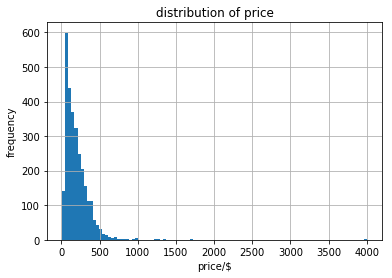

In [10]:
# price distribution with taking average of rental price of each house over time
grouped = df_calendar.groupby('listing_id')
grouped['price'].mean().hist(bins=100)
plt.title('distribution of price')
plt.xlabel('price/$')
plt.ylabel('frequency')

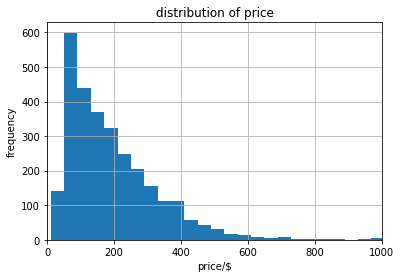

house average rental price is 196.93512743544002
house median rental price is 160.0


In [11]:
# let us look into the detail
grouped['price'].mean().hist(bins=100)
plt.xlim([0,1000])
plt.title('distribution of price')
plt.xlabel('price/$')
plt.ylabel('frequency')
plt.show()
print('house average rental price is {}'.format(grouped['price'].mean().mean()))
print('house median rental price is {}'.format(grouped['price'].mean().median()))

In [9]:
# is there a price fluctuation as season changes? //future to-dos

In [44]:
# there are too many columns in df_listings dataframe, a subset is selected for further analysis.
selected_features = ['description','accommodates','bathrooms',
                     'bedrooms','beds','price','minimum_nights','number_of_reviews',
                     'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value']
df_listings = df_listings[selected_features]

In [ ]:
# clean df_listings dataframe

In [ ]:
# get vocabulary of reviews from df_reviews

In [10]:
# cancatenate the dataframes if necessary.


### data exploration

In [11]:
# data exploration and form some valuable business questions as well as answering them.



### feature engineering

### modelling  
To understand how different factors effect the rental price of airbnb house. A regression model is needed to be built. With that model in hand, landlords could use it to set competitive prices for their houses, and tenets could also check if the price of houses they are going to live in is reasonable.

### clustering
Can we have a better understanding of what characteristics houses in airbnb have if we categorize them 
into several clusters?

### deploy (future work)  
To build a website for predicting airbnb rental price. The front end serves to collect data from users,
and back end is put to run trained model and a user could get a rental price based on his inputs.